# KNN

## libraries

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## feature scaling

In [5]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

## apply KNN

In [6]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

## prediction

In [7]:
classifier.predict(scale.transform([[30,87000]]))

array([0])

In [8]:
y_pred = classifier.predict(x_test)

## result

In [9]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[64,  4],
       [ 3, 29]])

In [10]:
accuracy_score(y_test, y_pred)

0.93

## visualisation (training)

/tmp/ipykernel_12133/3412251477.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)


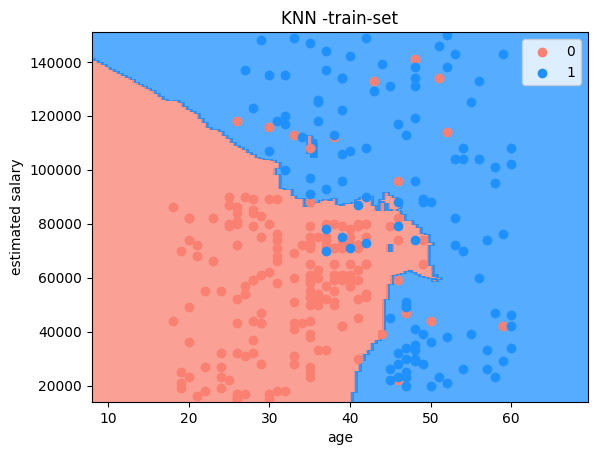

In [11]:
x_set, y_set = scale.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.5),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(x1, x2, classifier.predict(scale.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)
plt.title('KNN -train-set')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()

## visualisation (testing)

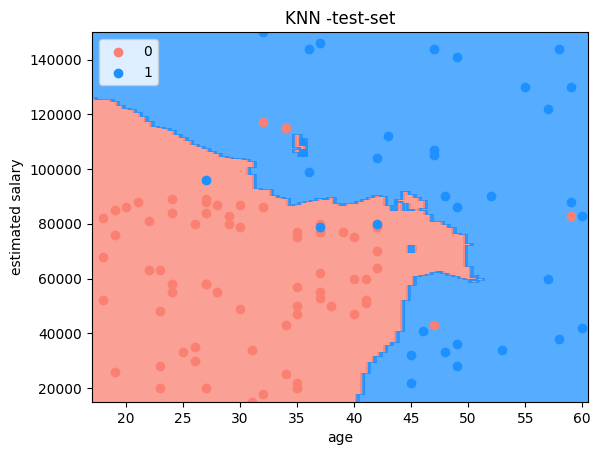

In [12]:
x_set, y_set = scale.inverse_transform(x_test), y_test
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.5),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.5)
)
z = classifier.predict(scale.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape)
plt.contourf(x1, x2, z, alpha=0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']) )
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
colors = ['#FA8072', '#1E90FF']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],
        color=colors[i], label=j
    )
plt.title('KNN -test-set')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()